In [11]:
get_ipython().magic('reset -sf')

# Models

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import time
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

## Linear Model

In [13]:
# Linear model
data_info = pd.read_csv('info_datav2.csv')

In [14]:
traindataset, testdataset = train_test_split(data_info, test_size=0.3, random_state=42)
x_train = traindataset.loc[:, traindataset.columns != 'IMP_VENTA_NETO_EUR']
y_train = traindataset.loc[:, traindataset.columns == 'IMP_VENTA_NETO_EUR']
x_train = x_train.drop(columns=['EDAD_RANGO_COMPRA'])
x_test = testdataset.loc[:, testdataset.columns != 'IMP_VENTA_NETO_EUR']
y_test = testdataset.loc[:, testdataset.columns == 'IMP_VENTA_NETO_EUR']
x_test = x_test.drop(columns = 'EDAD_RANGO_COMPRA')

In [15]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)
mseresults = pd.DataFrame([])
timeexecution = pd.DataFrame([])

In [16]:
lm = LinearRegression()
start_time = time.time()
model = lm.fit(x_train, y_train)
timeexecution['lm'] = (time.time() - start_time)
y_pred = lm.predict(x_test)
results = y_test.copy()
results['lm'] = y_pred

In [17]:
print(model.intercept_)
list(zip(x_train.columns, model.coef_[0]))

[108.43603993]


[('MES_FACTURA', -24.79456361156764),
 ('FECHA_FACTURA', -3.386633228536411),
 ('TEMPORADA_COMERCIAL_ID', 35.236812732120825),
 ('PRODUCTO_ID', 1.0332626403483576),
 ('TALLA', -7.746113562860942),
 ('ESFUERZO_VENTA_ID', 0.40853897541656853),
 ('NUMERO_DEUDOR_PAIS_ID', 6.052219714086457),
 ('JERARQUIA_PROD_ID', -0.09996876612839123),
 ('GRUPO_ARTICULO_PRODUCTO_ID', -30.479167370072215),
 ('GENERO_PRODUCTO', 13.880149910419485),
 ('CATEGORIA', -20.48640886137336),
 ('TIPOLOGIA', -3.9403792019943107),
 ('CONSUMER_COLOR', 1.1020329833348101),
 ('CONTACTO_SN', -0.426216914039596),
 ('EDAD_SN', -5.345946979971426),
 ('GENERO_CONTACTO', 0.29648481081460093),
 ('EDAD_COMPRA', 3.2250030542964865),
 ('CIUDAD_CONTACTO', -2.671214547490931),
 ('IDIOMA_CONTACTO', -1.0800000855505751)]

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mseresults['lm'] = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 27.01476819056739
Mean Squared Error: 1268.211687731751
Root Mean Squared Error: 35.61195989736806


## XGBoost Model

In [19]:
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=list(x_train.columns))
dtest = xgb.DMatrix(x_test, feature_names=list(x_test.columns))
params = {'max_depth':3, 'eta':0.2, 'subsample':1}
num_rounds = 1500
start_time = time.time()
bst = xgb.train(params, dtrain, num_rounds)
timeexecution['xgboost'] = (time.time() - start_time)
y_pred = bst.predict(dtest)
results['xgboost'] = y_pred

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mseresults['xgboost'] = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 13.532467196106946
Mean Squared Error: 356.7244542723238
Root Mean Squared Error: 18.887150506953763


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

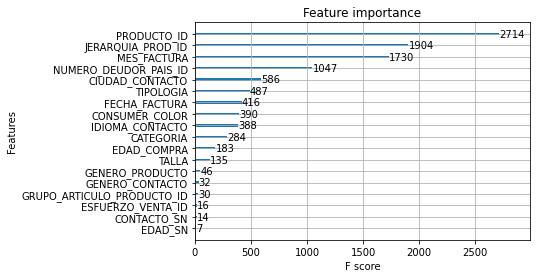

In [21]:
xgb.plot_importance(bst)

## k-nearest neighbour regression

In [ ]:
rmse_val = [] #to store rmse values for different k
mse_val = []
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
start_time = time.time()
model.fit(x_train, y_train)  #fit the model
timeexecution['knn'] = (time.time() - start_time)
y_pred=model.predict(x_test) #make prediction on test set
mse = metrics.mean_squared_error(y_test, y_pred)
error = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) #calculate rmse
rmse_val.append(error) #store rmse values
mse_val.append(mse)
results['knn'] = y_pred
mseresults['knn'] = metrics.mean_squared_error(y_test, y_pred)

In [ ]:
#curvermse = pd.DataFrame(rmse_val) #elbow curve 
#curvermse.plot()
#curvemse = pd.DataFrame(mse_val)
#curvemse.plot()

## Gaussian process regression

In [ ]:
#params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

#knn = neighbors.KNeighborsRegressor()

#model = GridSearchCV(knn, params, cv=10)
#model.fit(x_train,y_train)
#model.best_params_

In [ ]:
# massive dataset, try with something smaller
#kernel = DotProduct() + WhiteKernel()
#gpr = GaussianProcessRegressor(kernel=kernel).fit(x_train, y_train)
#gpr.score(x_train, y_train)
#y_pred = gpr.predict(x_test, return_std=True)
#results['gaussianP'] = y_pred

## Lasso Regression

In [22]:
lasso = LassoCV(cv = 10)
start_time = time.time()
model = lasso.fit(x_train, y_train)
timeexecution['lasso'] = (time.time() - start_time)
y_pred = lasso.predict(x_test)
results['lasso'] = y_pred

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mseresults['lasso'] = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 27.015136167539346
Mean Squared Error: 1268.1165583252412
Root Mean Squared Error: 35.6106242338609
